<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Prueba Examen Marta Simón
<a class="tocSkip">    
</h1> 

## Carga de las librerías estándar de Data Science con Python 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set()

# Preguntas del examen
## Apartado 1
+ Lee el fichero de datos y crea un data.frame de R llamado frami, que usaremos para el resto del examen.


In [3]:
# Leemos el fichero de datos
frami = pd.read_csv("data/Prueba Examen/frami.csv")
frami.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


+ **C1: ¿Cuántas observaciones hay en la tabla? ¿Cuántas variables?**

In [4]:
print(f"El numero de observaciones que hay en la tabla es de (filas, columnas): {frami.shape}")

El numero de observaciones que hay en la tabla es de (filas, columnas): (4240, 16)


In [5]:
print(f"Las columnas(variables) que componen la tabla son: {frami.columns}")

Las columnas(variables) que componen la tabla son: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


+ **C2: ¿Hay datos ausentes? ¿De qué tipo son las variables?**

In [6]:
# Localizamos los datos ausentes
Nan = frami.isnull().values.any()
print(f"¿Hay datos ausentes?: {Nan}")

¿Hay datos ausentes?: True


In [7]:
por_columna=frami.isna().sum()
print(f"El numero de valores nulos que hay en cada columna es de:\n{por_columna}")

El numero de valores nulos que hay en cada columna es de:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


Podemos ver que hay valores nulos en las columnas de `education`, `cigsPerDay`, `BPMeds`, `totChol`, `BMI`, `heartRate` y `glucose` .

Localizamos en qué fila se encuentra cada uno de ellos:

In [8]:
vars_with_nan = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate' , 'glucose']
for var in vars_with_nan:
    nan_var_row = frami.loc[frami[var].isna()].index
    print(f"Las filas en las que hay valores nulos para la variable '{var}' son: {nan_var_row}")


Las filas en las que hay valores nulos para la variable 'education' son: Int64Index([  33,   36,   72,  184,  213,  293,  305,  306,  319,  400,
            ...
            3764, 3868, 3873, 3943, 4012, 4082, 4098, 4121, 4122, 4138],
           dtype='int64', length=105)
Las filas en las que hay valores nulos para la variable 'cigsPerDay' son: Int64Index([ 131,  139, 1046, 1292, 1347, 1451, 1497, 1610, 1625, 1870, 1963,
            1980, 2405, 2513, 2542, 3021, 3034, 3094, 3106, 3108, 3156, 3177,
            3309, 3432, 3579, 3715, 3847, 3924, 3942],
           dtype='int64')
Las filas en las que hay valores nulos para la variable 'BPMeds' son: Int64Index([  49,   77,  193,  245,  314,  395,  421,  765,  769,  797,  998,
            1002, 1044, 1104, 1122, 1177, 1206, 1284, 1301, 1566, 1573, 1616,
            1721, 1857, 1861, 1913, 1983, 1985, 1986, 2002, 2074, 2120, 2173,
            2181, 2367, 2608, 2645, 2738, 2835, 2943, 3226, 3313, 3373, 3375,
            3526, 3644, 3737, 3791,

In [9]:
# el tipo de las variables las podemos ver con el método info:
frami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


En esta tabla, se puede ver que hay variables de varios tipos
+ **int64**: Como la edad o el nivel del trabajo
+ **float64**: Como DistanceFromHome
+ **Object** (factores): Como Education_Field



In [10]:
frami.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000



+ **C3: Antes de seguir adelante vamos a eliminar todas las observaciones que contienen datos ausentes. Asegúrate de que el conjunto de datos resultante se sigue llamando frami. ¿Cuántas observaciones han quedado en la tabla tras eliminar los datos ausentes?**



In [11]:
# Una vez localizamos los eliminamos
frami.dropna(inplace=True)
print("Valores nulos eliminados")
np.any(frami.isna())

Valores nulos eliminados


False

In [12]:
print(f"La tabla tiene {frami.shape[0]} observaciones tras eliminar los nulos.")

La tabla tiene 3658 observaciones tras eliminar los nulos.


## Apartado 2
+ **C4: Vamos a analizar la posible relación entre el factor género (variable male) y el factor fumador (variable currentSmoker). Haz un análisis mediante gráficos de esa relación. Calcula la tabla de probabilidad, con probabilidades marginales, asociada a la relación entre estos dos factores.**

In [13]:
CT = pd.crosstab(frami['male'], frami['currentSmoker'])
CT

currentSmoker,0,1
male,,
0,1227,808
1,642,981


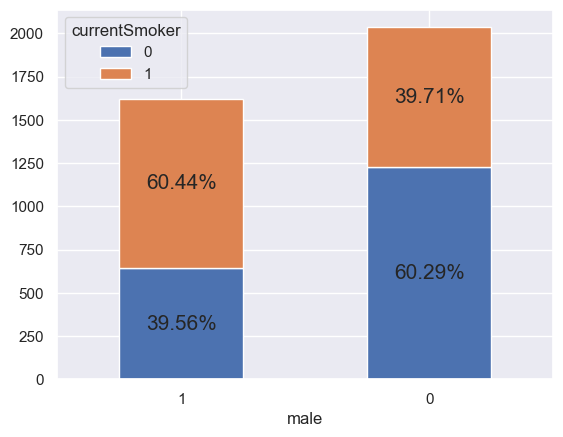

In [14]:
# Calculamos los totales
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')
# And plot the bar plot
# Para pintar lo mismo con porcentajes
percents = CT2.div(CT.total, axis = 0).mul(100).round(2)

percents.iloc[:, 0]

ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)


plt.show() 

+ **C5: ¿Cuál es la probabilidad de que un fumador sea mujer?**

In [15]:
#p(mujer|fumador)
probs = frami[frami.currentSmoker == 1].male.value_counts(normalize = True)
print(f"La P(mujer | fumador) = {probs[0]}")

La P(mujer | fumador) = 0.45164896590273895


+ **C6: ¿Y cuál es la probabilidad de que un hombre sea fumador?**

In [16]:
p_hombre_fumador = len(frami[(frami.male == 1) & (frami.currentSmoker == 1)])/len(frami)
print(f"P(Hombre y fumador) = {p_hombre_fumador}")

P(Hombre y fumador) = 0.26817933296883545


+ **C7: ¿Cuál es la probabilidad de que una persona elegida al azar sea fumadora? ¿Y de que sea a la vez hombre y no fumador?**

In [17]:
# Prob fumador
p_fumador = len(frami[frami.currentSmoker == 1])/len(frami)
print(f"P(fumador) = {p_fumador}")

# Prob hombre y no fumador
p = len(frami[(frami.male == 1) & (frami.currentSmoker == 0)])/len(frami)
print(f"P(Hombre y No fumador) = {p}")

P(fumador) = 0.48906506287588847
P(Hombre y No fumador) = 0.17550574084199017


+ **C8: Si las dos variables aleatorias género male y condición de fumador currentSmoker fueran independientes se cumpliría exactamente:**

$$P(hombre y fumador ) = P(hombre) · P(fumador )$$

**Pero los datos que tenemos son muestrales, así que lo más que podemos esperar es una igualdad
aproximada. ¿Se cumple esa igualdad aproximada en nuestros datos? ¿Qué opinas sobre la independencia
de estas variables?**

In [18]:
p_hombre = len(frami[frami.male == 1])/len(frami)
print(f"P(Hombre y fumador) = {p_hombre_fumador} = P(hombre)*P(Fumador) = {p_hombre * p_fumador}")

P(Hombre y fumador) = 0.26817933296883545 = P(hombre)*P(Fumador) = 0.21699086852038466


La desigualdad aproximada se cumple en nuestras variables por lo que podemos comprobar que son independientes.

+ **C9: Si elegimos de forma independiente (con remplazamiento) 10 personas de esta muestra, ¿cuál es la probabilidad de que 4 de ellas sean fumadoras? ¿Y cuál es la probabilidad de que lo sean 4 o menos?**

In [19]:
# Binomial
# En primer lugar debemos calcular la media
p_binom = np.mean(frami['currentSmoker'] == 1)
print(f"La media de fumadores es de: {p_binom}")

# Una vez hecho esto ya podemos calcular la binomial B(X=4)
p_4 = stats.binom.pmf(4, n = 10, p = p_binom)
print(f"La probabilidad de B(X=4) = {p_4})")

#B(X<= 4) --> Cola izquierda
p_4_menor = stats.binom.cdf(4, n = 10, p = p_binom)
print(f"La probabilidad de B(X<=4) = {p_4_menor})")

La media de fumadores es de: 0.48906506287588847
La probabilidad de B(X=4) = 0.21373687425981308)
La probabilidad de B(X<=4) = 0.4041401479531159)


## Apartado 3
+ **C10: En este apartado trabajamos con la variable heartRate, la frecuencia cardiaca. Haz un resumen numérico básico. ¿Es representativa la media? Represénta la variable gráficamente (puuedes usar más de un tipo de gráfico). Se valorará especialmente el uso de ggplot.**

In [20]:
frami['heartRate'].describe()

count    3658.000000
mean       75.730727
std        11.981525
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

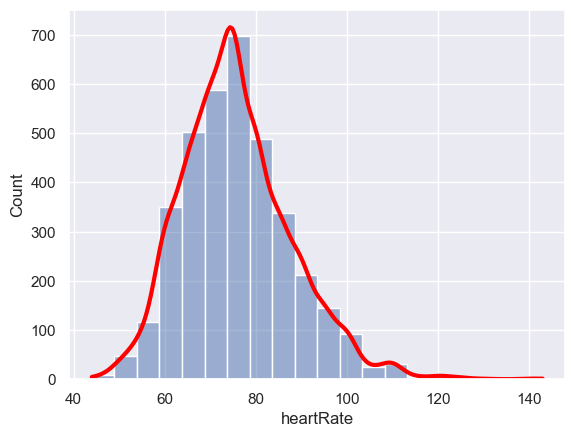

In [21]:
# Para representar variables continuas, podemos usar el histograma y la curva de densidad
# Se pueden pintar juntos histograma y curva de densidad
# KDE pinta la linea de densidad (sin ello solo pinta el histograma)
# data = Estructura/datos de entrada
# x, y = vectores o claves que especifican los ejes
# stat = density --> para normalizar el eje y, el area total suma 1 (rel_freq)
dens_plot = sns.histplot(data = frami, x = 'heartRate', kde=True, bins = 20)#, stat='density')
# Editamos el color y grosor de la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

+ **C11: ¿Hay datos atípicos? ¿Cuántos? ¿Sabes qué posiciones (número de fila) ocupan en la tabla?**

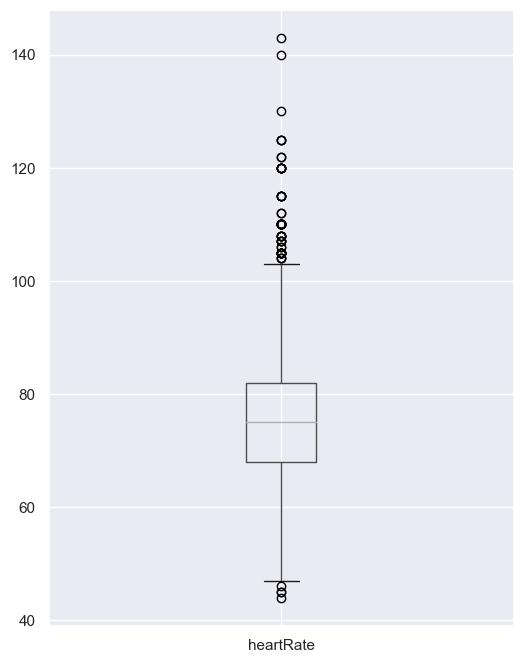

In [22]:
# Para revisar los datos atipicos podemos representar la variable con boxplot
getPlot = frami.boxplot(column='heartRate', figsize=(6, 8))
# La gráfica nos muestra que sí que hay valores atípicos

In [23]:
#Para calcular los valores atípicos:
 # Calculo de los valores atípicos --> Menores que el primer cuartil - 1,5*rango intercuartílico, mayores que el tercer cuartil +1,5*rango_intercuartíloco
# Calculamos el rango intercuartílico
heartRate_iqr = stats.iqr(frami.heartRate)
print(f"Rango intercuartílico: {heartRate_iqr}")

# Para localizar el primer y tercer cuartil.
heartRate_q1, heartRate_q3 = np.quantile(frami.heartRate, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = heartRate_q1 - 1.5 * heartRate_iqr
cut_high = heartRate_q3 + 1.5 * heartRate_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
price_outliers = frami.loc[(frami.heartRate < cut_low) | (frami.heartRate > cut_high)]

print("The outliers are located in rows: ", price_outliers.index)

price_outliers
# Representación mediante boxpots (sección gráficos)

Rango intercuartílico: 14.0
Lower and upper outlier limits: 47.0 ,  103.0
The outliers are located in rows:  Int64Index([ 162,  270,  339,  358,  409,  492,  523,  562,  630,  639,  697,
             722,  740,  742,  824,  833,  909,  911,  913,  923,  983, 1008,
            1022, 1182, 1233, 1462, 1570, 1728, 1783, 1790, 1807, 1844, 1881,
            1902, 2041, 2162, 2180, 2237, 2242, 2275, 2299, 2382, 2388, 2434,
            2459, 2482, 2492, 2646, 2663, 2733, 2750, 2922, 3037, 3112, 3142,
            3164, 3194, 3225, 3231, 3233, 3242, 3343, 3391, 3425, 3495, 3505,
            3585, 3740, 3747, 3800, 3819, 3844, 3862, 3875, 3912, 3964, 4053,
            4070, 4164, 4195],
           dtype='int64')


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
162,0,47,2.0,0,0.0,0.0,0,0,0,174.0,118.0,86.5,26.15,110.0,86.0,0
270,0,54,1.0,0,0.0,0.0,0,1,0,273.0,139.0,98.0,29.06,110.0,73.0,1
339,0,64,1.0,0,0.0,0.0,0,1,0,312.0,160.0,82.0,27.59,140.0,94.0,0
358,0,40,3.0,1,20.0,0.0,0,0,0,210.0,118.0,79.0,21.21,130.0,84.0,0
409,1,44,1.0,1,10.0,0.0,0,1,0,229.0,177.5,120.0,39.88,104.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,0,39,3.0,0,0.0,0.0,0,0,0,213.0,125.0,87.0,16.73,110.0,75.0,0
4053,0,44,1.0,0,0.0,0.0,0,0,0,160.0,107.0,69.0,18.63,125.0,78.0,0
4070,0,40,3.0,0,0.0,0.0,0,1,0,202.0,158.0,103.0,28.35,125.0,80.0,0
4164,1,39,2.0,1,20.0,0.0,0,0,0,287.0,136.0,86.0,19.00,112.0,83.0,0


+ **C12: ¿Crees que está variable es aproximadamente normal? Justifica tu conclusión basándote en los gráficos del apartado anterior o en algún gráfico adicional.**

Dado el gráfico de la densidad de la variable, podemos concluir que es aproximadamente normal. Para asegurarnos de ello, vamos a hacer un qqplot de la variable para ver si se ajusta a la normal.

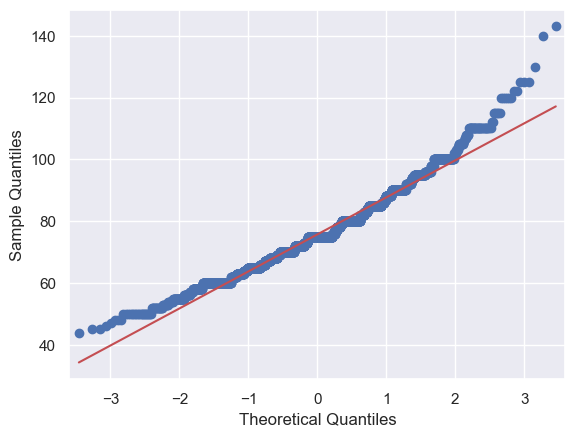

In [24]:
getPlot = sm.qqplot(frami.heartRate, line="s")

+ **C13: *Asumiendo que es aproximadamente normal (sea cual sea tu conclusión del apartado anterior)* construye un intervalo de confianza al 95% para la media de esta variable,**

In [25]:
n = len(frami)
print("El numero de empleados de la muestra es de:" ,n)
barX = frami.heartRate.mean()
print("La media muestral es de: ", barX)
s = frami.heartRate.std()
print("La varianza es de: ", s)

sl = 0.95
alpha = 1 - sl

crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)
# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("El intervalo de confianza es ", conf_int)
print("Redondeamos a 4 digitos: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

El numero de empleados de la muestra es de: 3658
La media muestral es de:  75.73072717331875
La varianza es de:  11.981525363310121
El intervalo de confianza es  [75.34245314 76.11900121]
Redondeamos a 4 digitos: [75.34, 76.12]


## Apartado 4
+ **C14: ¿Cuántas personas padecen diabetes? Para las personas que padecen diabetes y que tienen edades superiores a 50 años ¿cuál es su nivel medio de colesterol?**

In [26]:
print(f"Hay {frami.diabetes.value_counts()[1]} personas que padecen diabetes.")
media_chol = frami[(frami.diabetes == 1) & (frami.age >50)].totChol.mean()
print(f"El nivel medio de colesterol en personas con diabetes y mayores de 50 años es de {media_chol}")

Hay 99 personas que padecen diabetes.
El nivel medio de colesterol en personas con diabetes y mayores de 50 años es de 257.6619718309859


+ **C15: Haced una tabla cruzada en la que parezca el nivel medio de colesterol para cada combinación posible de las variables nivel de educación y género (male).**

In [27]:
frami.groupby(["education","male"]).totChol.mean()

education  male
1.0        0       241.825767
           1       233.665260
2.0        0       237.378462
           1       231.811530
3.0        0       239.854271
           1       234.480952
4.0        0       237.058140
           1       234.442231
Name: totChol, dtype: float64

## Apartado 5
+ **C16: Analicemos ahora la posible relación entre las variables presión sistólica sysBP y presión diastólica diaBP. Haz un diagrama de dispersión y un modelo de regresión lineal usando sysBP como variable respuesta y diaBP como variable explicativa. Añade la recta de regresión lineal al diagrama de dispersión.**

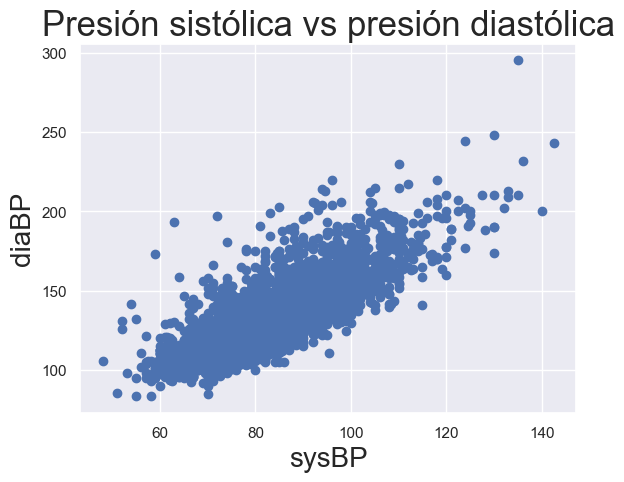

In [28]:
# Pintamos la relación entre ambas variables
plt.plot('diaBP','sysBP', 'bo', data=frami)
plt.xlabel('sysBP', fontdict={'fontsize':20})   
plt.ylabel('diaBP', fontdict={'fontsize':20})
plt.title('Presión sistólica vs presión diastólica', fontdict={'fontsize':25})
plt.show()

In [29]:
# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression

X = sm.add_constant(frami.diaBP) # para añadir una constante en la matriz para que a la hora de multiplicar no se modifique.
Y = frami.sysBP.values
print(X)
model_frami = sm.OLS(Y, X)# OLS comes from Ordinary Least Squares, minimizamos las medias (areas de los cuadrados)
frami_fit = model_frami.fit()
frami_fit.summary()

      const  diaBP
0       1.0   70.0
1       1.0   81.0
2       1.0   80.0
3       1.0   95.0
4       1.0   84.0
...     ...    ...
4233    1.0   92.0
4234    1.0   80.0
4237    1.0   83.0
4238    1.0   98.0
4239    1.0   86.0

[3658 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5936.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:05:36   Log-Likelihood:                -14747.
No. Observations:                3658   AIC:                         2.950e+04
Df Residuals:                    3656   BIC:                         2.951e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0551      1.578      7.640      0.000       8.962      15.149
diaBP          1.4510      0.019     77.045      0.000       1.414       1.488
==============================================================================
Omnibus:                      929.609   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2863.079
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                       6.480   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[[ 1.         48.        ]
 [ 1.         48.95454545]
 [ 1.         49.90909091]
 [ 1.         50.86363636]
 [ 1.         51.81818182]]


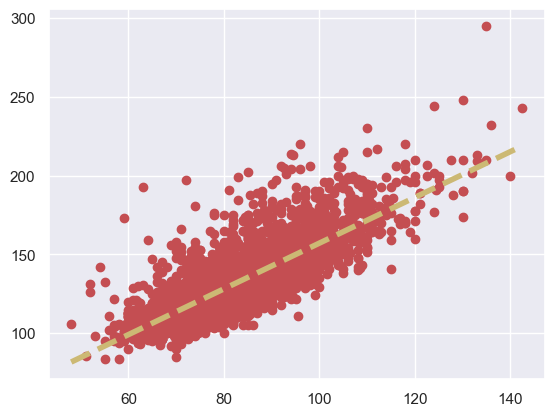

In [30]:
# Dibujamos el diagrama de dispersión
# The linspace funtion generates the grid
# linespace es como un rango, le das el minimo y el máximo y el numero de trozos en los que quieres dividir.
X_new = np.linspace(X.min(), X.max(), num = 100) # pinta los puntos rojos.
print(X_new[:5])
# Predict the corresponding Y-values
Y_new = frami_fit.predict(X_new)

#Plot the sample
plt.plot(X.iloc[:,1], Y, 'ro') # pinta la muestra
# And the regression line = "predicted points"
plt.plot(X_new[:,1], Y_new, "y--", lw = 4)
plt.show()

+ **C17: ¿Crees que el modelo de regresión lineal es adecuado para describir la relación entre esas variables?**

Sí, es adecuado porque se ve que las variables se distribuyen aproximadamente de forma uniforme a lo largo de la recta de regresión

+ **C18: ¿Qué porcentaje de la variabilidad en diaBP se explica con ese modelo de regresión?**

In [31]:
# El porcentaje de variabilidad (Pearson) es de: 
frami_fit.rsquared

0.6188486783818301

Como podemos ver, la variabilidad del modelo está algo más alto de 0.5, por lo que podríamos decir que el modelo no es bueno (cerca de 1), pero tampoco es muy malo (cerca de 0)

+ **C19: ¿Cuál es el valor de diaBP que predice el modelo para alguien con sysBP igual a 160? Se valora el uso de predict.**

In [32]:
# En primer lugar comprobamos si ya existe el valor 160 en nuestro modelo
np.any(frami.sysBP == 160)

True

In [33]:
X_new = 0
# Ahora predecimos dicho valor
# Creamos un dataframe para pasarle dos dimensiones al predict
# quiero predecir un valor nuevo, lo metemos en un array para pasarlo como param. porque se pueden predecir varios a la vez
X_new = pd.DataFrame({"constant": [1], "value":[160]})

# una vez especificados los valores, le decimos que lo prediga, a partir de la recta que hemos calculado antes (y = 12.0551 + 1.4510 x)
# por eso, siempre que hacemos esto, estamos calculando valores de la recta.
# Use the predict method from our model
Y_new = frami_fit.predict(X_new)
# Look at the predicted values
print(f"El valor que predice nuestro modelo para sysBp =  160 es: {Y_new[0]}")

El valor que predice nuestro modelo para sysBp =  160 es: 244.22060086787147


+ **C20: ¿Cuál es el residuo de la primera observación de la tabla?**

In [34]:
print(f"El residuo de la primera observación de la tabla es de {frami_fit.resid[0]}")

El residuo de la primera observación de la tabla es de -7.6275004874379135


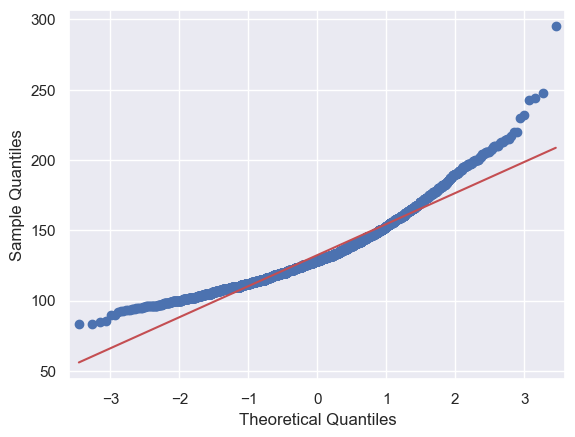

In [35]:
# Para ver el residuo podemos hacer un qqplot
getPlot = sm.qqplot(frami.sysBP, line="s")

+ **C21: Pensemos en la variable nivel de colesterol totChol. Sospechamos que el nivel medio de colesterol de las personas de la muestra es mayor que 235. ¿Avalan los datos esta sospecha, con un nivel de significación del 95%?**

In [36]:
# Ha = {mu>235}

# Tenemos los valores de los datos, asique podemos realizar una muestra con ttest de la libreria stats
Tscore, pValue = stats.ttest_1samp(frami.totChol, 
                                   popmean=235, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="greater") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(frami.totChol.size))
print("The sample mean is {:.4}".format(frami.totChol.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))


The sample size is 3658
The sample mean is 236.8
The T score is 2.534
And the corresponding p-value is 0.005656


Con un nivel de significacion del 95%, para saber si rechazar o no la hipotesis nula deberemos comparar el pvalor con 0.05 (1 - sl). En este caso, el pvalor es de 0.005, que es menor que nuestro alpha, y por lo tanto, podemos rechazar la hipotesis nula.

+ **C22: Repite el análisis pero ahora solo con observaciones correspondientes a hombres. Y luego con
observaciones de mujeres. ¿Qué piensas sobre la relación entre nivel de colesterol y el género?**

In [37]:
frami_hombres = frami[frami.male == 1]

# Tenemos los valores de los datos, asique podemos realizar una muestra con ttest de la libreria stats
Tscore, pValue = stats.ttest_1samp(frami_hombres.totChol, 
                                   popmean=235, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="greater") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(frami.totChol.size))
print("The sample mean is {:.4}".format(frami.totChol.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is 3658
The sample mean is 236.8
The T score is -1.592
And the corresponding p-value is 0.9442


In [38]:
frami_mujeres = frami[frami.male == 0]

# Tenemos los valores de los datos, asique podemos realizar una muestra con ttest de la libreria stats
Tscore, pValue = stats.ttest_1samp(frami_mujeres.totChol, 
                                   popmean=235, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="greater") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(frami.totChol.size))
print("The sample mean is {:.4}".format(frami.totChol.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is 3658
The sample mean is 236.8
The T score is 4.511
And the corresponding p-value is 3.409e-06


Viendo los resultados del cálculo de las hipotesis para homvres vs mujeres, podemos observar que el pvalor de los hombres es mucho mayor, por lo que en su caso no se rechazaría la hipótesis nula. Sin embarlo, el pvalor de las mujeres es muy pequeño, lo que nos haría rechazar la hipótesis. Esto nos hace pensar que el género y el nivel de colesterol están altamente relacionados, en concreto, parece ser que en las mujeres va a tender a ser mayor que en los hombres.

+ **C23: Estudia la normalidad de la variable edad.**

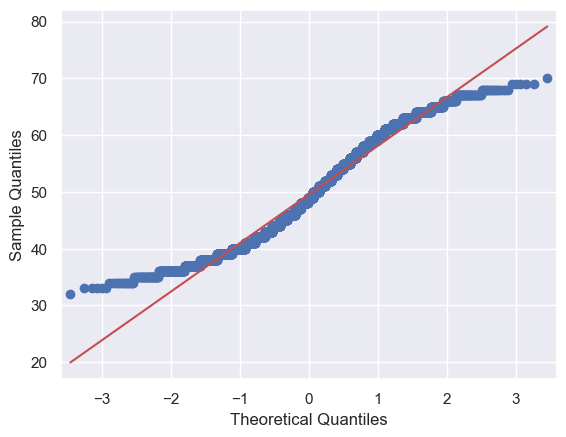

In [39]:
# Para estudiar la normalidad, vamos a pintar la gráfica qqplot de la variable

getPlot = sm.qqplot(frami.age, line="s")

+ **C24: Divide la variable edad en 4 subintervalos de longitud 10 años y llama franjaEdad al resultado.
Divide el colesterol en intervalos de 100 unidades desde 100 hasta 600 y llama nivelCol al resultado.
Ahora estudia la psible relación entre franjaEdad y nivelCol.**

In [40]:
# Dividimos la edad
Age_nodes = np.arange(frami.age.min(), frami.age.max(), 10) # Con esto, generamos un array de numeros ordenados

print(Age_nodes)

Age_bins = pd.cut(frami.age, bins=Age_nodes, ordered=True) # Ahora le indicamos en el param bins los rangos de los contenedores que debe usar
Age_bins

[32 42 52 62]


0       (32, 42]
1       (42, 52]
2       (42, 52]
3       (52, 62]
4       (42, 52]
          ...   
4233    (42, 52]
4234    (42, 52]
4237    (42, 52]
4238    (32, 42]
4239    (32, 42]
Name: age, Length: 3658, dtype: category
Categories (3, interval[int64, right]): [(32, 42] < (42, 52] < (52, 62]]

In [41]:
# Dividimos el colesterol
Chol_nodes = np.arange(100, 600, 100) # Con esto, generamos un array de numeros ordenados

print(Chol_nodes)

Chol_bins = pd.cut(frami.totChol, bins=Chol_nodes, ordered=True) # Ahora le indicamos en el param bins los rangos de los contenedores que debe usar
Chol_bins

[100 200 300 400 500]


0       (100, 200]
1       (200, 300]
2       (200, 300]
3       (200, 300]
4       (200, 300]
           ...    
4233    (300, 400]
4234    (200, 300]
4237    (200, 300]
4238    (100, 200]
4239    (100, 200]
Name: totChol, Length: 3658, dtype: category
Categories (4, interval[int64, right]): [(100, 200] < (200, 300] < (300, 400] < (400, 500]]

In [42]:
# Creamos una cross table para pintar la relacion entre ambas variables
CT = pd.crosstab(Age_bins, Chol_bins)
CT

totChol,"(100, 200]","(200, 300]","(300, 400]","(400, 500]"
age,,,,
"(32, 42]",365,547,38,3
"(42, 52]",235,1013,88,3
"(52, 62]",126,800,120,2


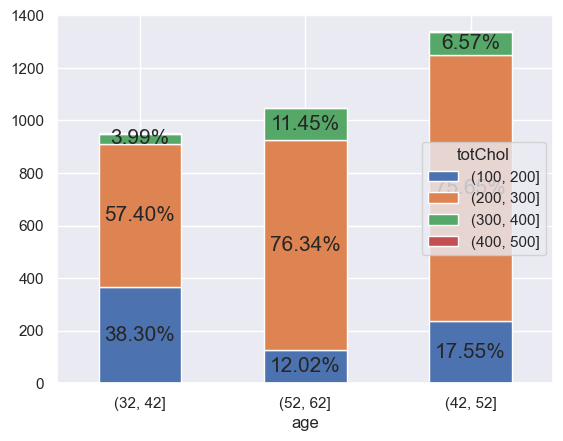

In [43]:
# Para estudiar la relación entre ambas bariables "binneadas", vamos a usar un diagrama de barras
# para ordenar las barras de mayor a menor, hacemos la suma y lo ordenamos por el total
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')
# And plot the bar plot
#ax = CT2.plot.bar(stacked = True, rot = 0) # stacked para hacerlo apilado
# Para pintar lo mismo con porcentajes
percents = CT2.div(CT.total, axis = 0).mul(100).round(2)

percents.iloc[:, 0]

ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)


plt.show()  